# <font color='red'>Project: TMDb movie data analysis</font>
# ==========================================================




**Name:**  Peter Adel Forez

**Email:** Peter.Forez@gmail.com

## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We will investigate the following questions:
* Who is the director with the laregest number of movies?
* What is the month of high production?
* Which year has the maximumn production of movies?
* Which movie has the highest revenue?
* What is the average runtime accross years?
* What is the most produced genre?
* Which genres are most popular from year to year?
* What is the change in features from year to year?
* What kind of properties are associated with movies that have high revenues?

## Reference

* https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True
* https://pandas.pydata.org/docs/user_guide/index.html
* https://www.kaggle.com/tmdb/tmdb-movie-metadata
* https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
* https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
* https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns
* https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python

# <font color='red'>Import the Libraries and Data Set</font>
# ==========================================================

## Import Libraries

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import math
from scipy import stats
% matplotlib inline

## Load the dataset

In [2]:
df_Original = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
df = df_Original.copy()

# <font color='red'>Data Wrangling</font>
# ==========================================================

## General Properties

In [3]:
 print("The dataset contains", df.shape[0], "Rows and", df.shape[1], "Columns")

The dataset contains 10866 Rows and 21 Columns


In [4]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

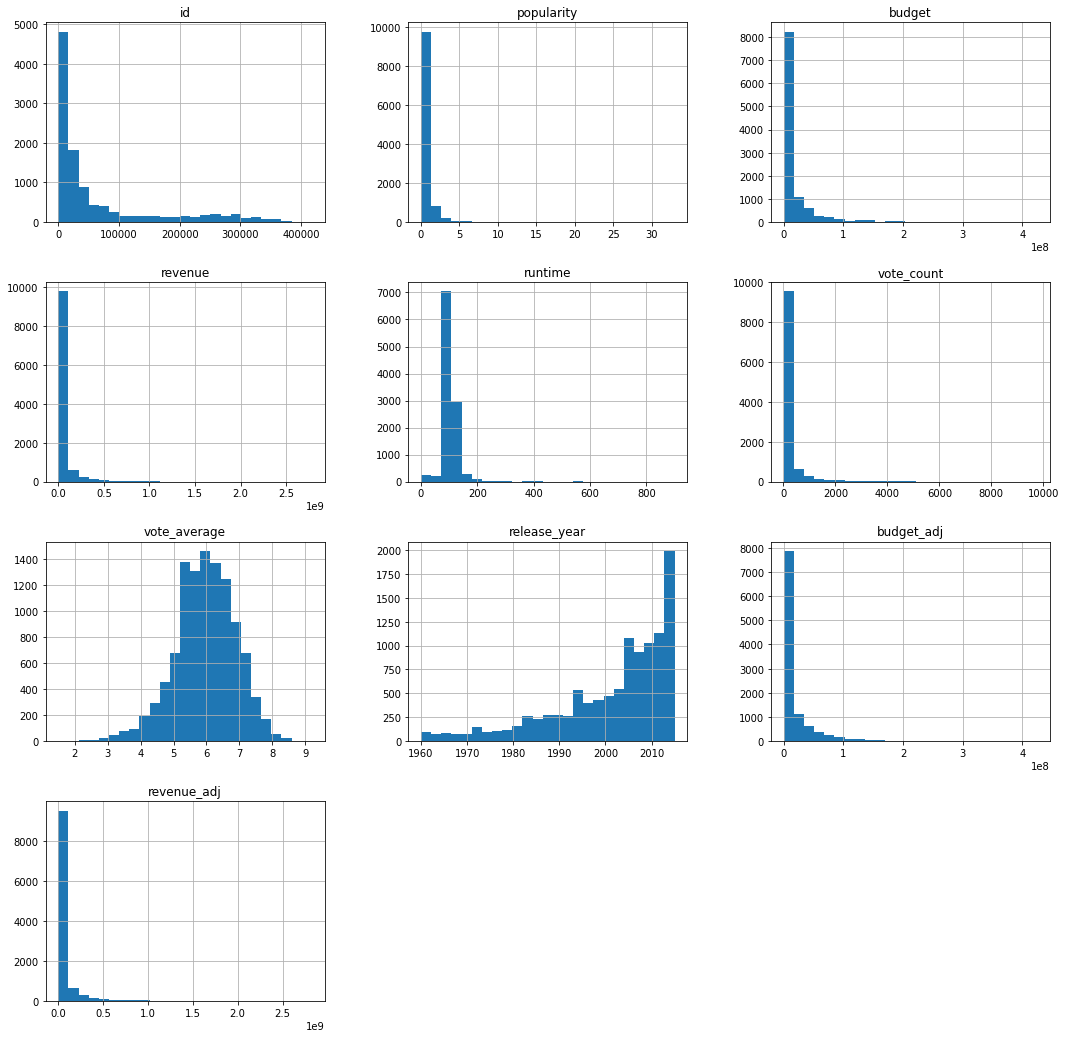

In [7]:
df.hist(figsize=(18,18), bins = 25);

## Data Cleaning

### Day Month Year of the Release

In [8]:
df = df_Original.copy()
df[["release_month", "release_day", "Release_year"]] = pd.DataFrame(df["release_date"].str.split("/").tolist(), columns = ["release_month", "release_day", "Release_year"])
df.drop(["Release_year", "release_date"], axis = 1, inplace = True)
df.release_month = pd.to_datetime(df.release_month, format='%m').dt.month_name()
df.release_day = df.release_day.astype('int64')
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,15,1.5,1966,127642.279154,0.0,November,15


### Drop duplicate

In [9]:
print("Start: Number of duplicated rows = ", sum(df.duplicated(keep = False)))
df.drop_duplicates(inplace=True)
print("End:   Number of duplicated rows = ", sum(df.duplicated(keep = False)))

Start: Number of duplicated rows =  2
End:   Number of duplicated rows =  0


### Add column for the profit

In [10]:
df["profit_adj"] = df["revenue_adj"] - df["budget_adj"]

### Drop columns

In [11]:
# the information in 'id' and 'imdb_id' are useless for our analysis
# the information in "release_year" is already included in "release_date"
# the infomartion in "budget" and "revenue" are already included in "budget_adj" and "revenue_adj"
df.drop(['id', 'imdb_id', "budget", "revenue"], axis=1, inplace = True)
# Drop unimportant columns in our analysis 
df.drop(['cast','homepage','director','tagline','keywords','overview', 'production_companies'], axis=1, inplace = True)
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,profit_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,June,9,1.254446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,May,13,2.101614e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,March,18,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,December,15,1.718723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,April,1,1.210949e+09


### Drop rows from "genres" column

In [12]:
print("Start: Number of rows with NAN values =", df.genres.isnull().sum())
df = df[df.genres.notna()] #OR #df.dropna(subset=['genres'], inplace=True)  
print("End  : Number of rows with NAN values =", df.genres.isnull().sum())

Start: Number of rows with NAN values = 23
End  : Number of rows with NAN values = 0


### Drop rows from "revenue_adj" and "budget_adj" column

In [13]:
print("Start: Number of rows with zero values =", (df.revenue_adj == 0).sum())
df = df[df.revenue_adj != 0] 
print("End  : Number of rows with zero values =", (df.revenue_adj == 0).sum())

Start: Number of rows with zero values = 5993
End  : Number of rows with zero values = 0


In [14]:
print("Start: Number of rows with zero values =", (df.budget_adj == 0).sum())
df = df[df.budget_adj != 0] 
print("End  : Number of rows with zero values =", (df.budget_adj == 0).sum())

Start: Number of rows with zero values = 995
End  : Number of rows with zero values = 0


### Remove Ouliers

In [15]:
print("Start: shape of data set", df.shape)
# Separate your data into parts with numerical and categorical features
num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(exclude=["number"])
# IQR
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
idx = ~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)
df = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)
print("End  : shape of data set", df.shape)

Start: shape of data set (3854, 12)
End  : shape of data set (2985, 12)


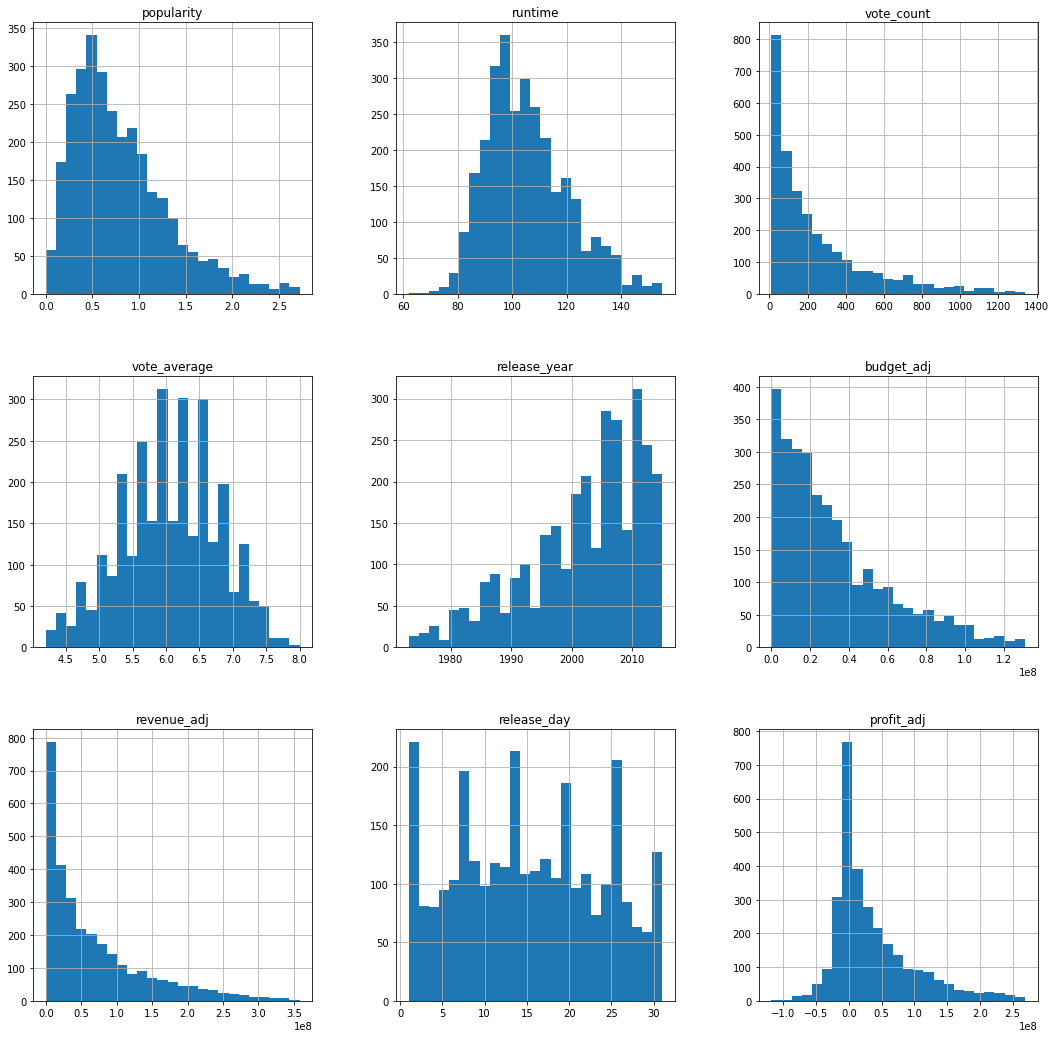

In [16]:
df.hist(figsize=(18,18), bins = 25);

### Null Values

In [17]:
df.isnull().sum()

popularity        0
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
release_day       0
profit_adj        0
original_title    0
genres            0
release_month     0
dtype: int64

In [18]:
df.columns[df.isnull().any()].tolist()

[]

In [19]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 54 to 10793
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      2985 non-null   float64
 1   runtime         2985 non-null   int64  
 2   vote_count      2985 non-null   int64  
 3   vote_average    2985 non-null   float64
 4   release_year    2985 non-null   int64  
 5   budget_adj      2985 non-null   float64
 6   revenue_adj     2985 non-null   float64
 7   release_day     2985 non-null   int64  
 8   profit_adj      2985 non-null   float64
 9   original_title  2985 non-null   object 
 10  genres          2985 non-null   object 
 11  release_month   2985 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 303.2+ KB


### Unique genre


In [20]:
#https://www.w3schools.com/python/python_howto_remove_duplicates.asp
genresList = list(dict.fromkeys( (df.genres.dropna()+"|").sum().split("|") ))

In [21]:
genresDF = pd.DataFrame()
for l in genresList[:-1]:
    genresDF.loc[l,"Count"] = df[df.genres.dropna().str.contains(l, na=False)].shape[0]

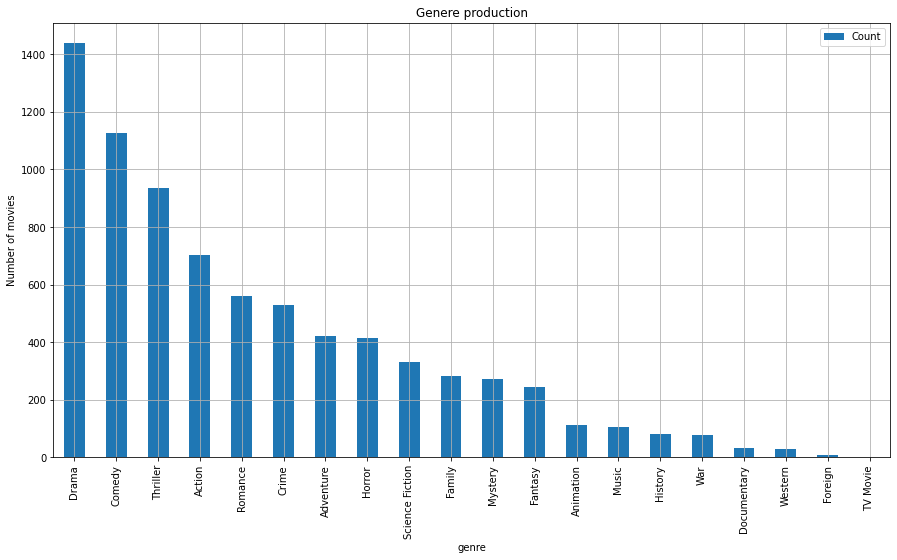

In [22]:
genresDF.sort_values("Count", ascending=False).plot(kind= "bar", figsize = (15,8));
plt.title("Genere production")
plt.xlabel('genre');
plt.ylabel('Number of movies');
plt.grid(True);
plt.legend();

### Separated the movies genre

In [23]:
# https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows 
df_genres = df_Original.dropna(subset=["genres"])
s = df_genres['genres'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'genres'
del df_genres['genres']
df_genres = df_genres.join(s)

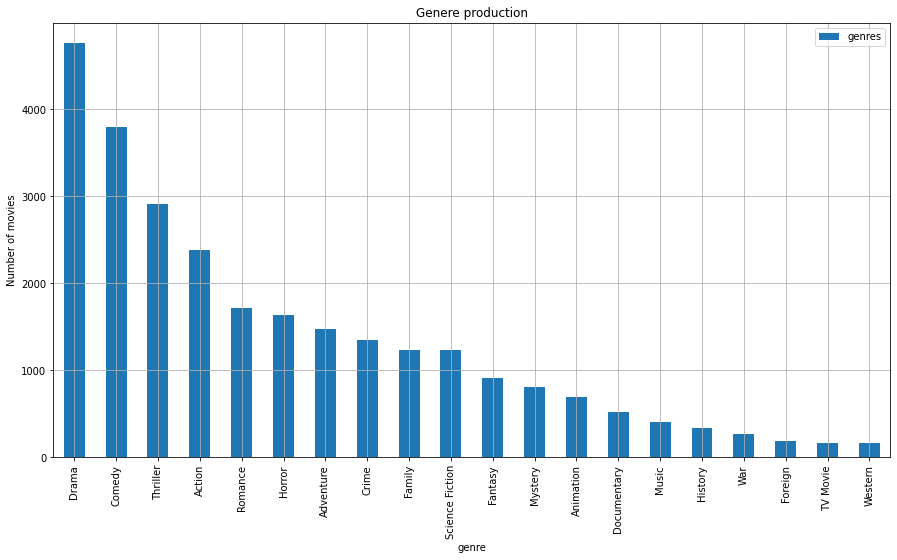

In [24]:
plt.figure(figsize = (15,8))
df_genres.genres.value_counts().plot(kind = "bar", grid = True);
plt.title("Genere production")
plt.xlabel('genre');
plt.ylabel('Number of movies');
plt.grid(True);
plt.legend();

# <font color='red'>Exploratory Data Analysis</font>
# ==========================================================

### Q: Who is the director with the laregest number of movies?

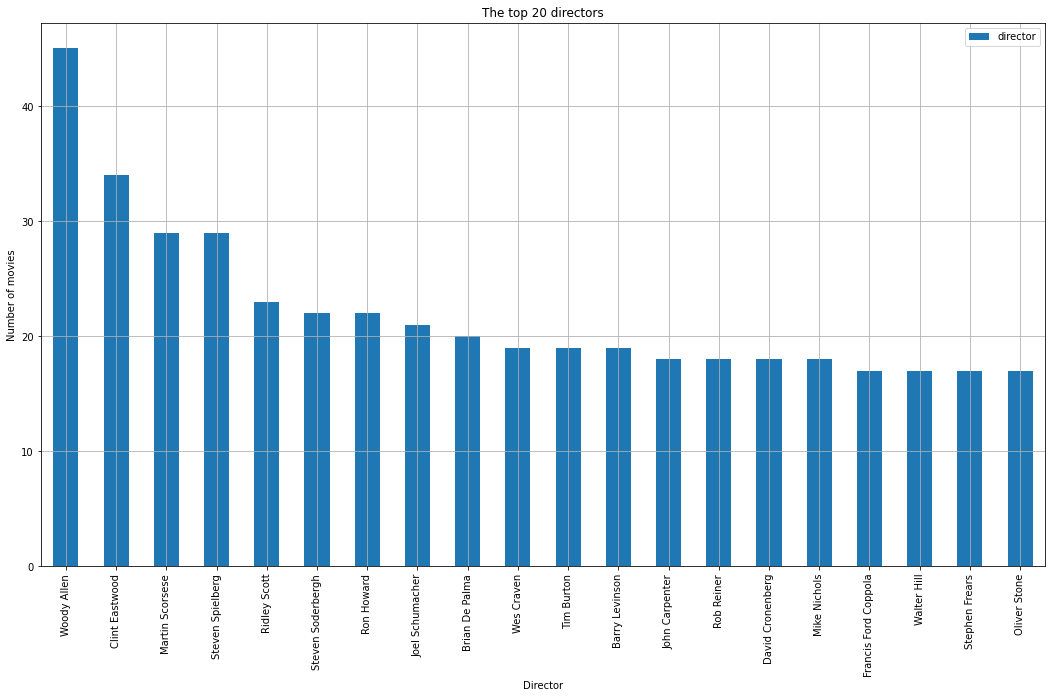

In [25]:
df_Original.director.value_counts().iloc[:20].plot.bar(figsize=(18,10));
plt.title('The top 20 directors')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.legend();
plt.grid()

In [26]:
print("The director", df_Original.director.value_counts().idxmax(), "has worked in a", df_Original.director.value_counts().max(), "films.")

The director Woody Allen has worked in a 45 films.


### Q: What is the month of high production?

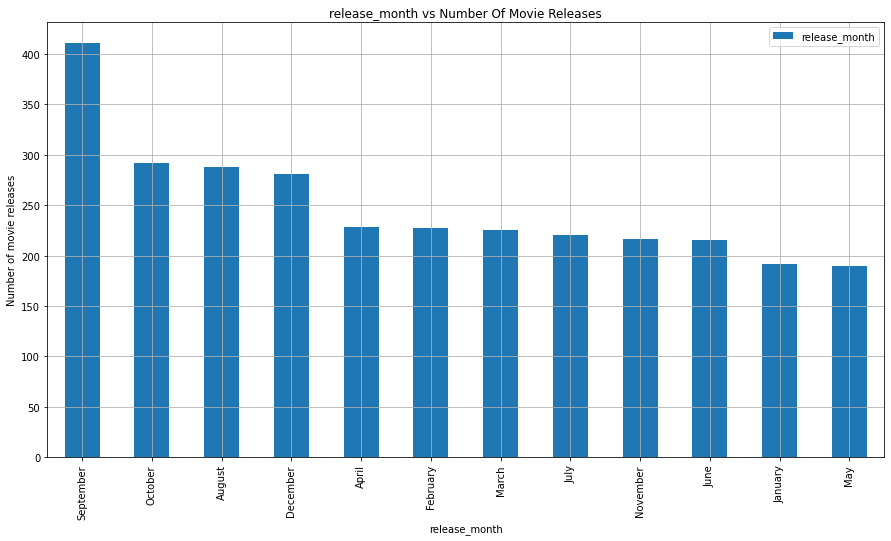

In [27]:
plt.figure(figsize = (15,8))
df.sort_values(by="release_month").release_month.value_counts().plot.bar()
plt.title('release_month vs Number Of Movie Releases')
plt.xlabel('release_month')
plt.ylabel('Number of movie releases')
plt.legend();
plt.grid(True);

In [28]:
print("The month of high production is", df.sort_values(by="release_month").release_month.value_counts().idxmax())

The month of high production is September


### Q: Which year has the maximum production of movies?

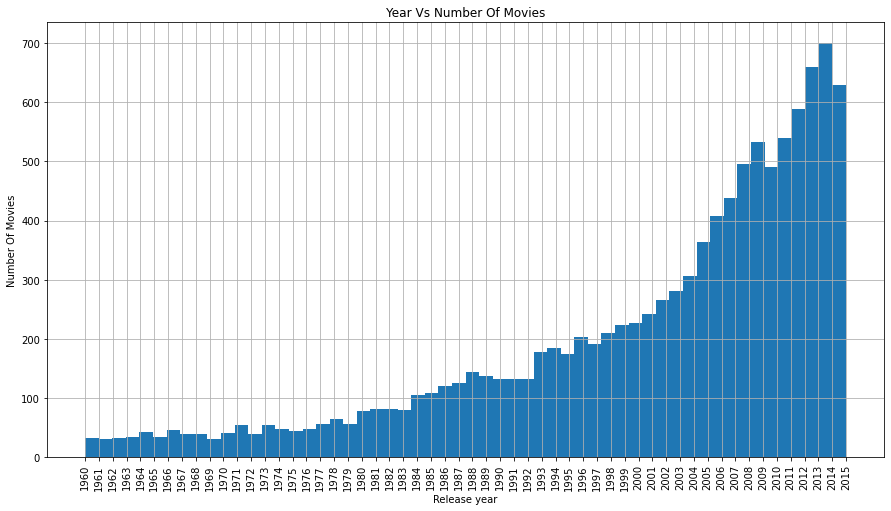

In [29]:
plt.figure(figsize = (15,8))
df_Original.release_year.hist(bins=df_Original.release_year.max()-df_Original.release_year.min()+1);
plt.title("Year Vs Number Of Movies")
plt.xlabel('Release year');
plt.ylabel('Number Of Movies');
plt.xticks(np.arange(df_Original.release_year.min(), df_Original.release_year.max()+1, step=1), rotation='vertical')
plt.grid(True);
plt.show()

In [30]:
print("The year with maximum movies prduction is", df_Original.release_year.value_counts().idxmax(), 
      "and it has", df_Original.release_year.value_counts().max() ,"movies")

The year with maximum movies prduction is 2014 and it has 700 movies


### Q: Which movie has the heighest "revenue_adj"?

In [31]:
print("The film", df_Original.iloc[df_Original.revenue_adj.idxmax()]["original_title"], 
      "got the highest revenue", df_Original.iloc[df_Original.revenue_adj.idxmax()]["revenue_adj"])

The film Avatar got the highest revenue 2827123750.41189


### Q: What is the average runtime accross years?

y=-0.088541x+(282.837116)


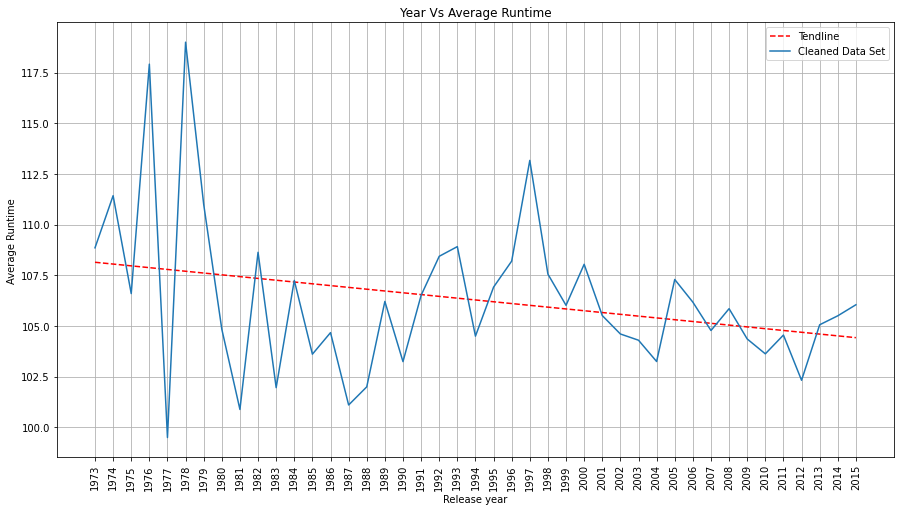

In [32]:
plt.figure(figsize = (15,8))
x = df.groupby("release_year").runtime.mean().index
y = df.groupby("release_year").runtime.mean().values

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", label = "Tendline")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.plot(x,y, label = "Cleaned Data Set") #df_Original.groupby("release_year").mean().runtime.plot.line()
plt.title("Year Vs Average Runtime")
plt.xlabel('Release year');
plt.ylabel('Average Runtime');
plt.xticks(np.arange(df.release_year.min(), df.release_year.max()+1, step=1), rotation='vertical')
plt.grid(True);
plt.legend()

In [33]:
print("The average runtime across years is {:.0f} min." .format(df.groupby("release_year").runtime.mean().mean()) )

The average runtime across years is 106 min.


###Q: What is the increase in revenue across years?

y=-145340.929906x+(323790189.072639) : The relation between {} and {} release_year budget_adj
y=-1052834.460520x+(2175650462.506066) : The relation between {} and {} release_year revenue_adj
y=-907493.530613x+(1851860273.433428) : The relation between {} and {} release_year profit_adj


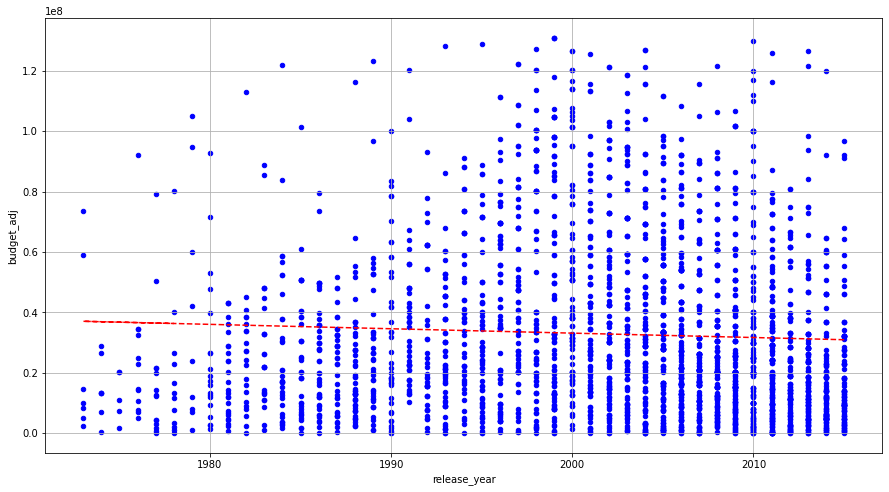

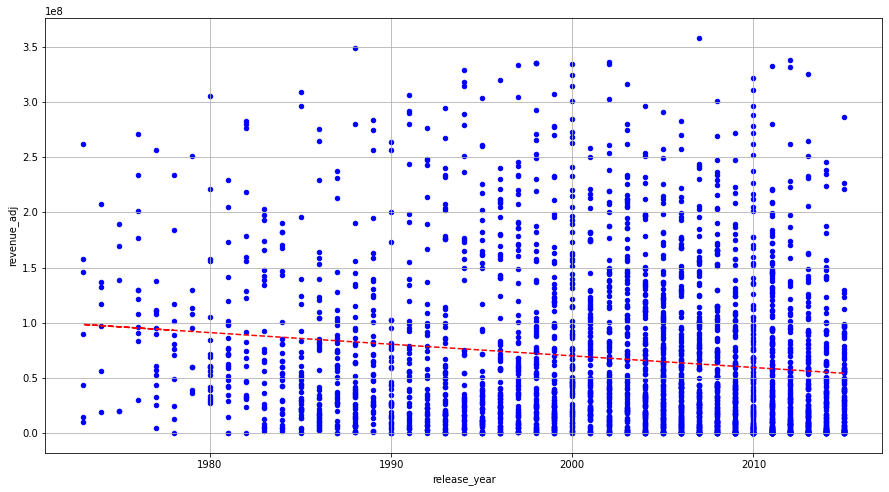

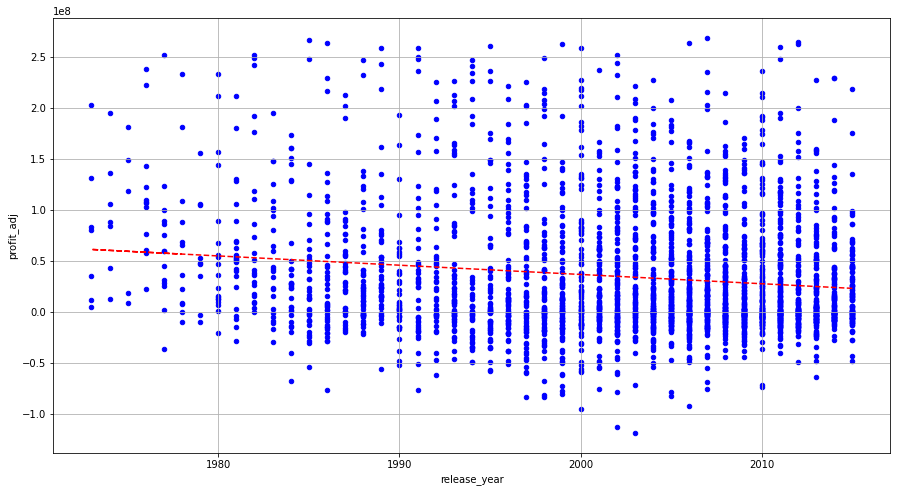

In [34]:
x_1 = "release_year"
y_c = ["budget_adj", "revenue_adj", "profit_adj"]

for y_1 in y_c:
  x = df[x_1]
  y = df[y_1]

  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)

  df.plot.scatter(x=x_1, y=y_1, grid = True, color = "blue", figsize = (15,8));
  plt.plot(x,p(x),"r--");
  # the line equation:
  print ("y=%.6fx+(%.6f) : The relation between {} and {}"%(z[0],z[1]), x_1, y_1)

The budget, revenue and profit decrease over years

### Q: What is most produced genre?

In [35]:
# https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows 
df_genres = df.copy()
s = df_genres.genres.str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'genres'
del df_genres['genres']
df_genres = df_genres.join(s)

In [36]:
df_genres.genres.unique()

array(['Action', 'Crime', 'Thriller', 'Drama', 'Science Fiction',
       'Mystery', 'Comedy', 'Adventure', 'Horror', 'History', 'War',
       'Animation', 'Family', 'Romance', 'Fantasy', 'Music', 'Western',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

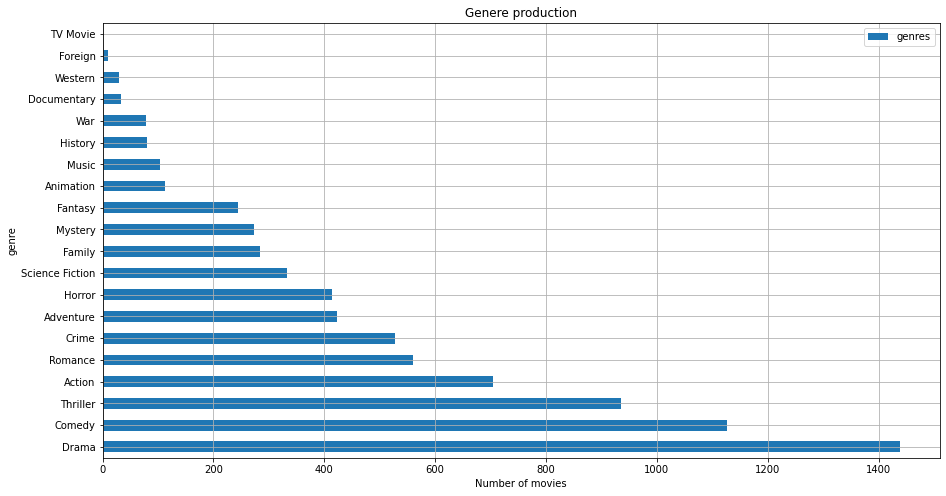

In [37]:
plt.figure(figsize = (15,8))
df_genres.genres.value_counts().plot.barh(grid = True);

plt.title("Genere production")
plt.xlabel('Number of movies');
plt.ylabel('genre');
plt.grid(True);
plt.legend();

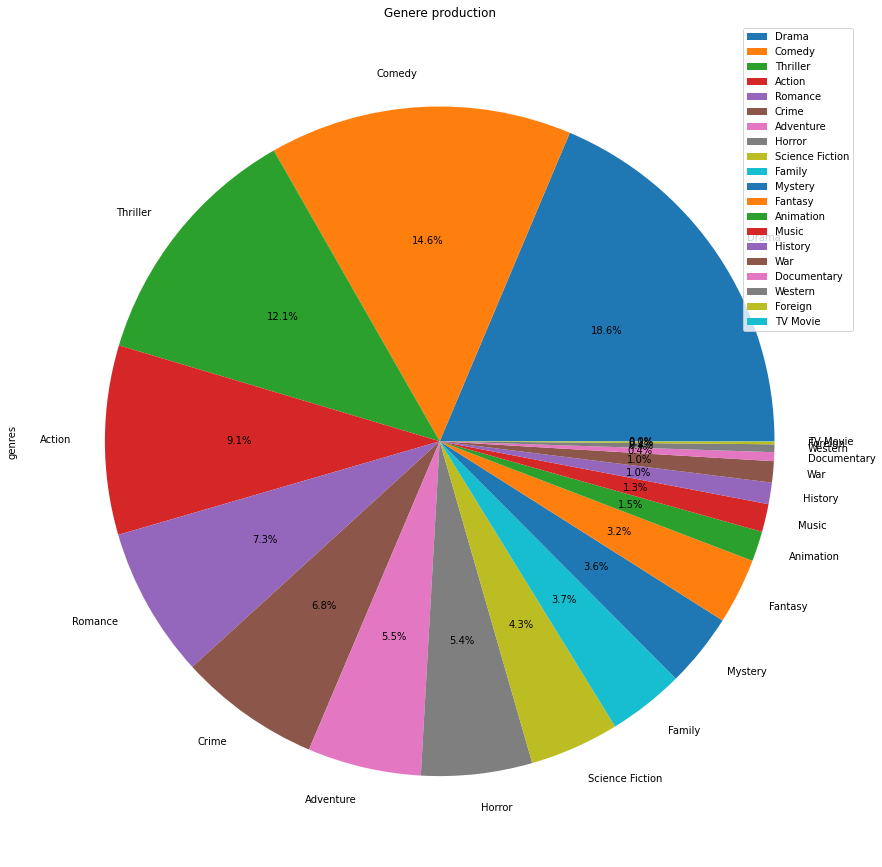

In [38]:
df_genres.genres.value_counts().plot.pie(autopct='%1.1f%%', figsize = (15,20));
plt.title("Genere production")
plt.legend(loc = 1);

In [39]:
print("The genere that is produced the most is", df_genres.genres.value_counts().idxmax())
print("It is produced", df_genres.genres.value_counts().max(),"times")

The genere that is produced the most is Drama
It is produced 1438 times


### Q: Which genres are most popular from year to year?

In [40]:
YearGeneres = pd.pivot_table(df_genres,index =["genres"], columns=["release_year"], values="popularity", aggfunc=['mean'])
YearGeneres.fillna(value = 0.0, inplace = True)
YearGeneres.head()

mean                      ...                              
release_year      1973      1974      1975  ...      2013      2014      2015
genres                                      ...                              
Action        0.471749  0.426461  0.000000  ...  1.147528  1.536729  1.803104
Adventure     0.000000  0.463337  2.234953  ...  1.113173  1.154081  1.622093
Animation     2.272486  0.000000  0.000000  ...  0.969579  1.237873  1.605365
Comedy        0.568400  0.000000  1.512965  ...  1.021326  1.152270  1.262365
Crime         0.564056  0.807168  0.277357  ...  1.096272  1.302589  1.681139

[5 rows x 43 columns]

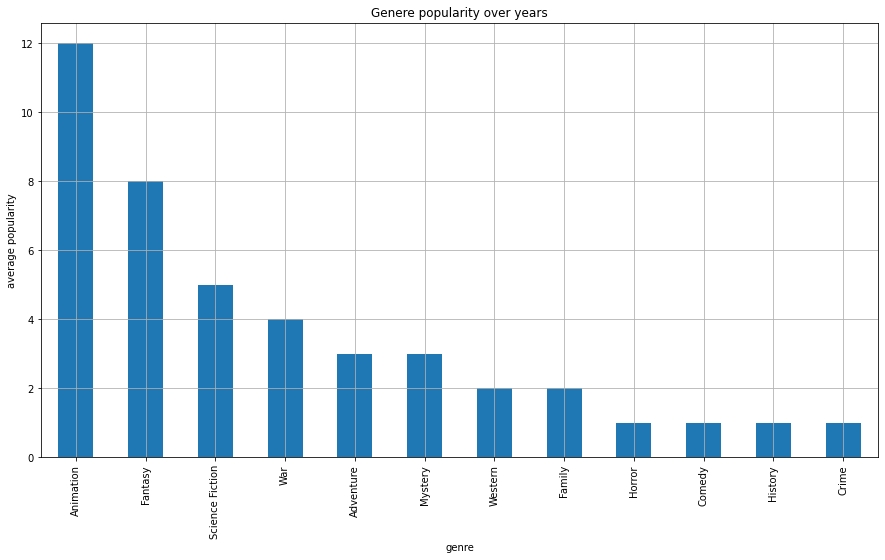

In [41]:
YearGeneres.idxmax().value_counts().plot.bar(figsize = (15,8));
plt.title("Genere popularity over years")
plt.xlabel('genre');
plt.ylabel('average popularity');
plt.grid(True);

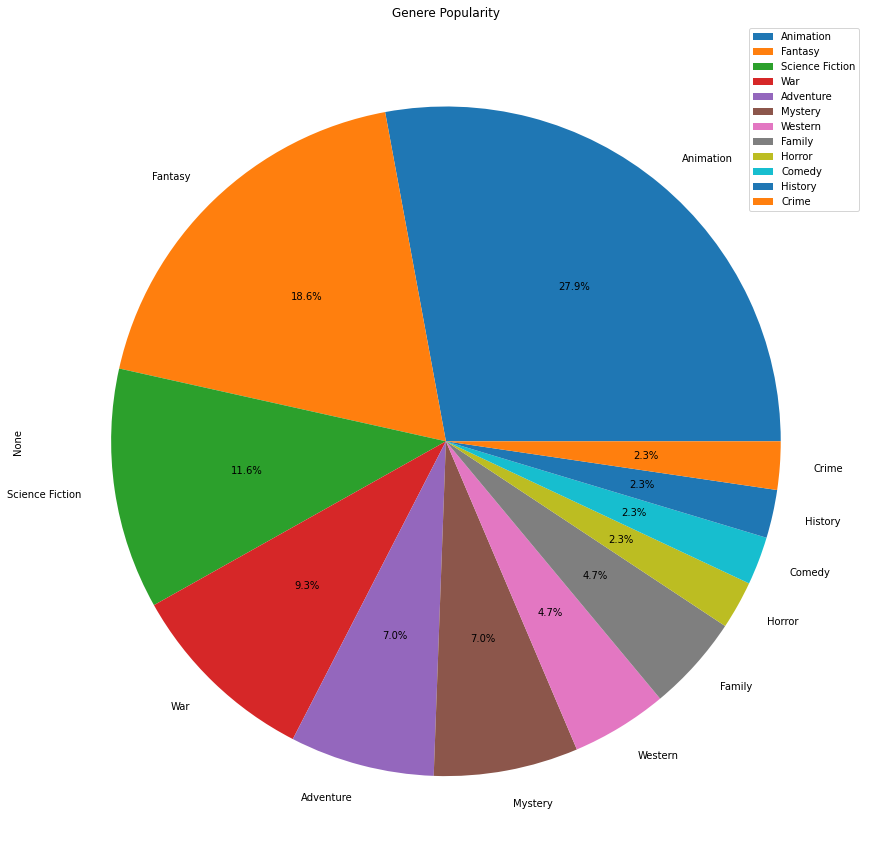

In [42]:
YearGeneres.idxmax().value_counts().plot.pie(autopct='%1.1f%%', figsize = (15,20));
plt.title("Genere Popularity")
plt.legend(loc = 1);

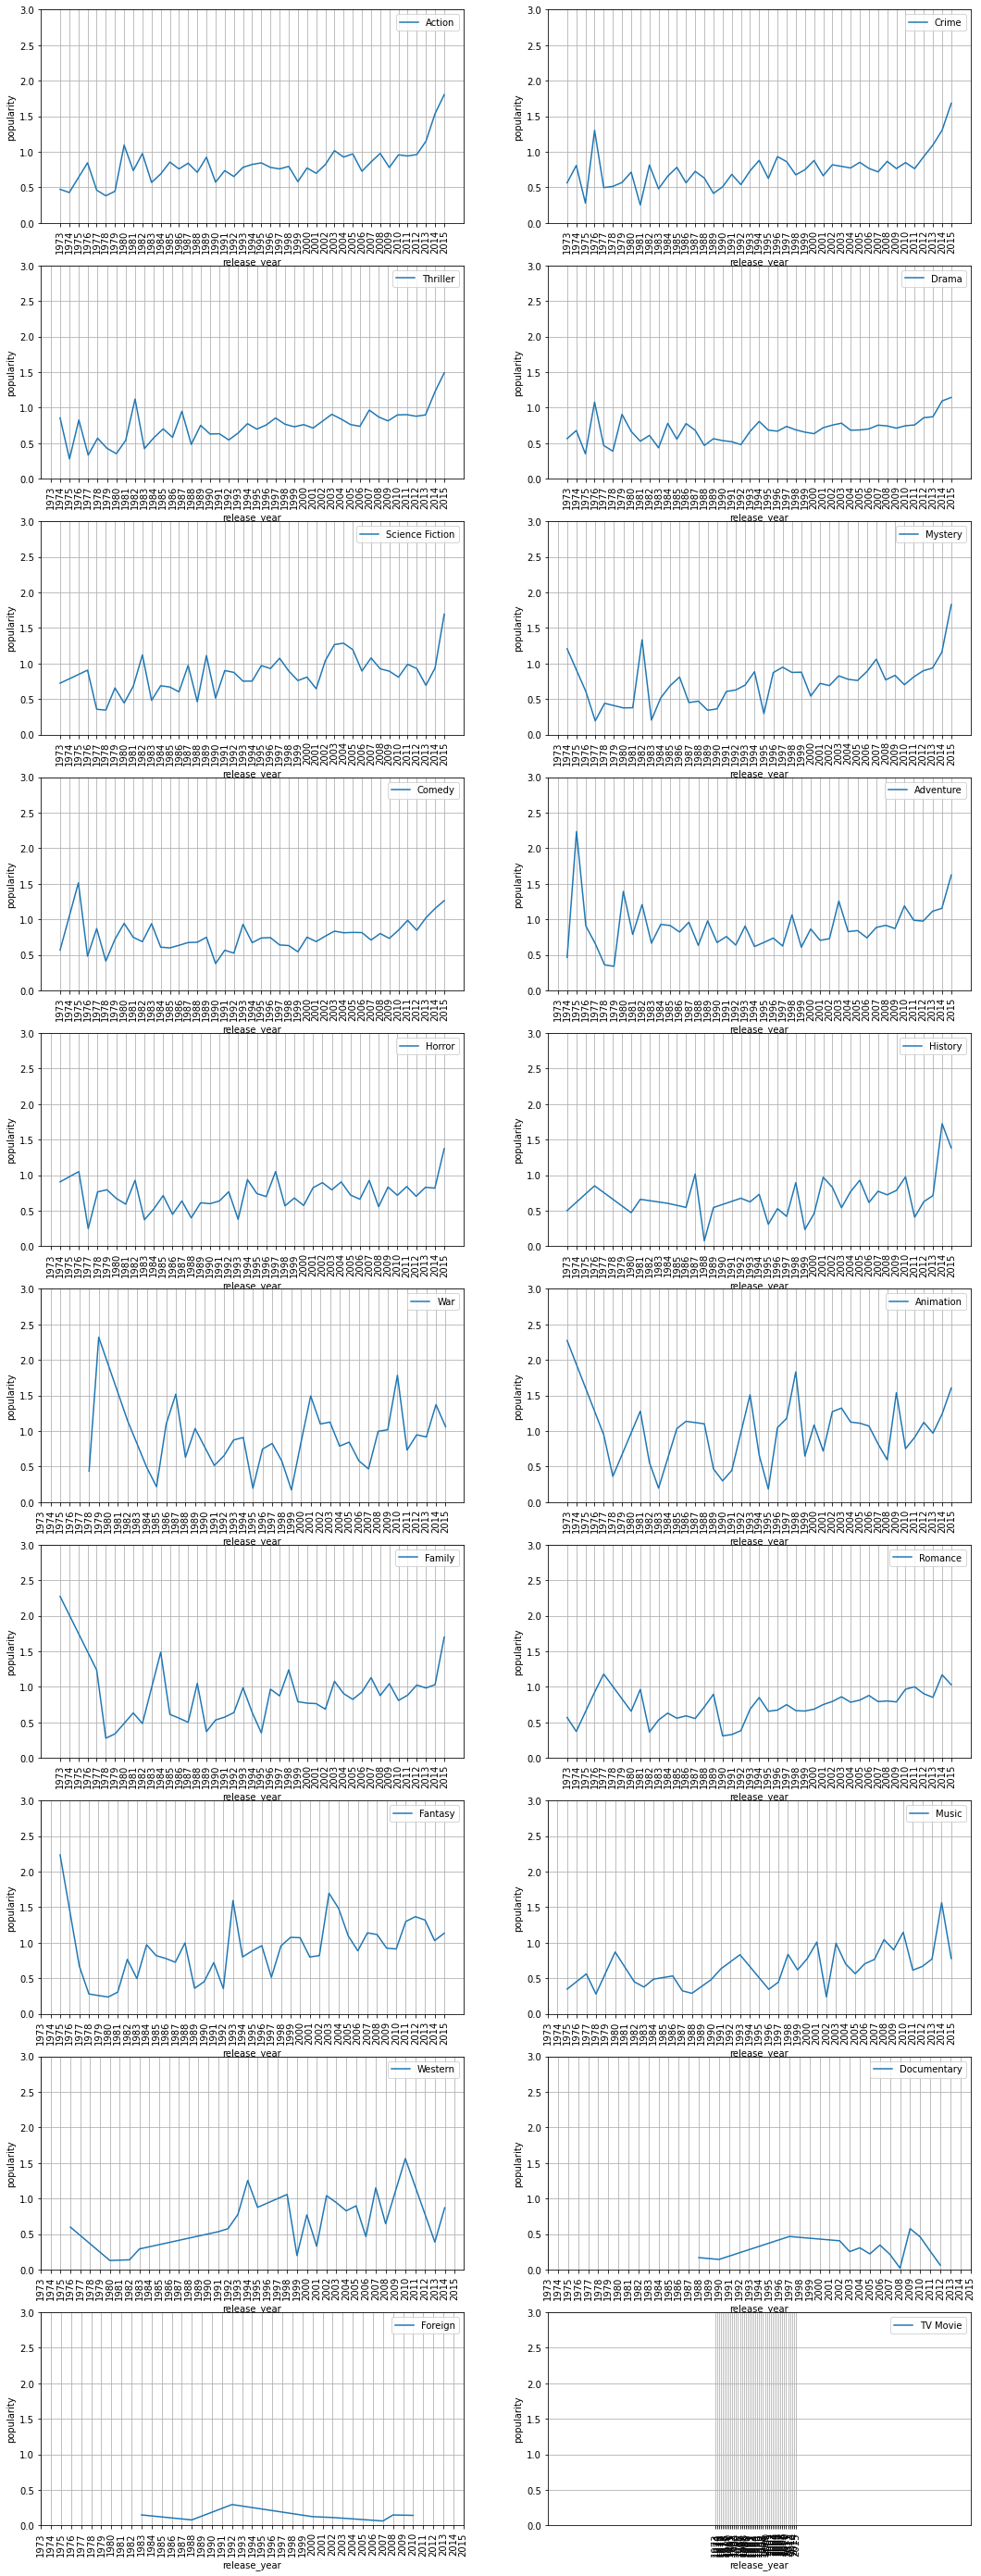

In [43]:
plt.figure(figsize = (18,50))

for i, g in enumerate(df_genres.genres.unique()):
  plt.subplot(len(df_genres.genres.unique())/2, 2, i+1)
  df_genres[df_genres.genres == g].groupby(["release_year"]).popularity.mean().plot(label = g).set_ylim(0,3)
  plt.ylabel('popularity');
  plt.xticks(np.arange(df_genres.release_year.min(), df_genres.release_year.max()+1, step=1), rotation='vertical')
  plt.grid()
  plt.legend();

The animation is the most popular genre

### Q: What is the change in the features from year to year?

#### Individual correlation

release_year    1.000000
vote_count      0.252239
popularity      0.196018
release_day     0.005635
runtime        -0.037365
budget_adj     -0.049123
vote_average   -0.115612
revenue_adj    -0.139830
profit_adj     -0.142478
Name: release_year, dtype: float64


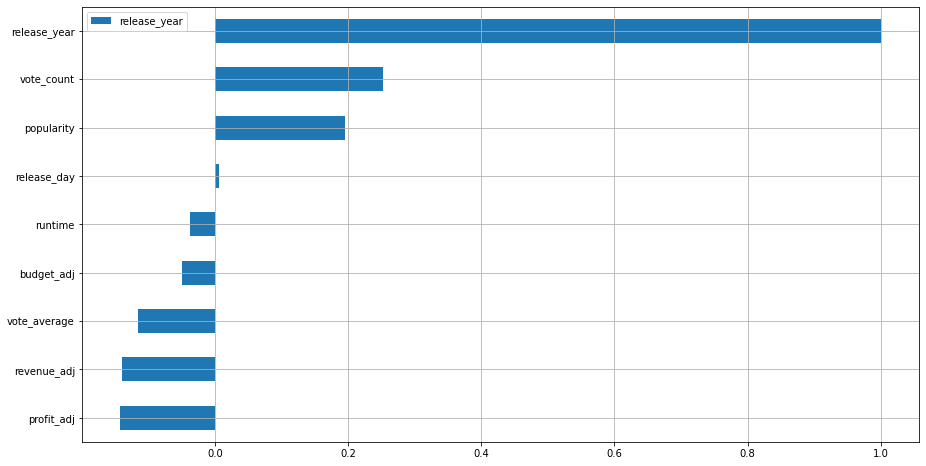

In [44]:
plt.figure(figsize = (15,8))
df.corr()["release_year"].sort_values(ascending=True).plot.barh();
print(df.corr()["release_year"].sort_values(ascending=False))
plt.grid()
plt.legend();

#### Scatter Plot and regression equation

y = 0.010414473949607777 x + -20.0527003049856400 : Regression Line between 'release_year' and 'popularity'
y = -0.05892450842544925 x + 223.5305874123873800 : Regression Line between 'release_year' and 'runtime'
y = 7.105176344196854000 x + -13970.9868434653470 : Regression Line between 'release_year' and 'vote_count'
y = -0.008642599448525889 x + 23.36330507932705600 : Regression Line between 'release_year' and 'vote_average'
y = 1.000000000000000000 x + 0.000000000000000000 : Regression Line between 'release_year' and 'release_year'
y = -145340.929906530160 x + 323790189.0727753000 : Regression Line between 'release_year' and 'budget_adj'
y = -1052834.46051986170 x + 2175650462.506232300 : Regression Line between 'release_year' and 'revenue_adj'
y = 0.0049861421211760465 x + 5.196589504185617000 : Regression Line between 'release_year' and 'release_day'
y = -907493.530613331400 x + 1851860273.433457000 : Regression Line between 'release_year' and 'profit_adj'


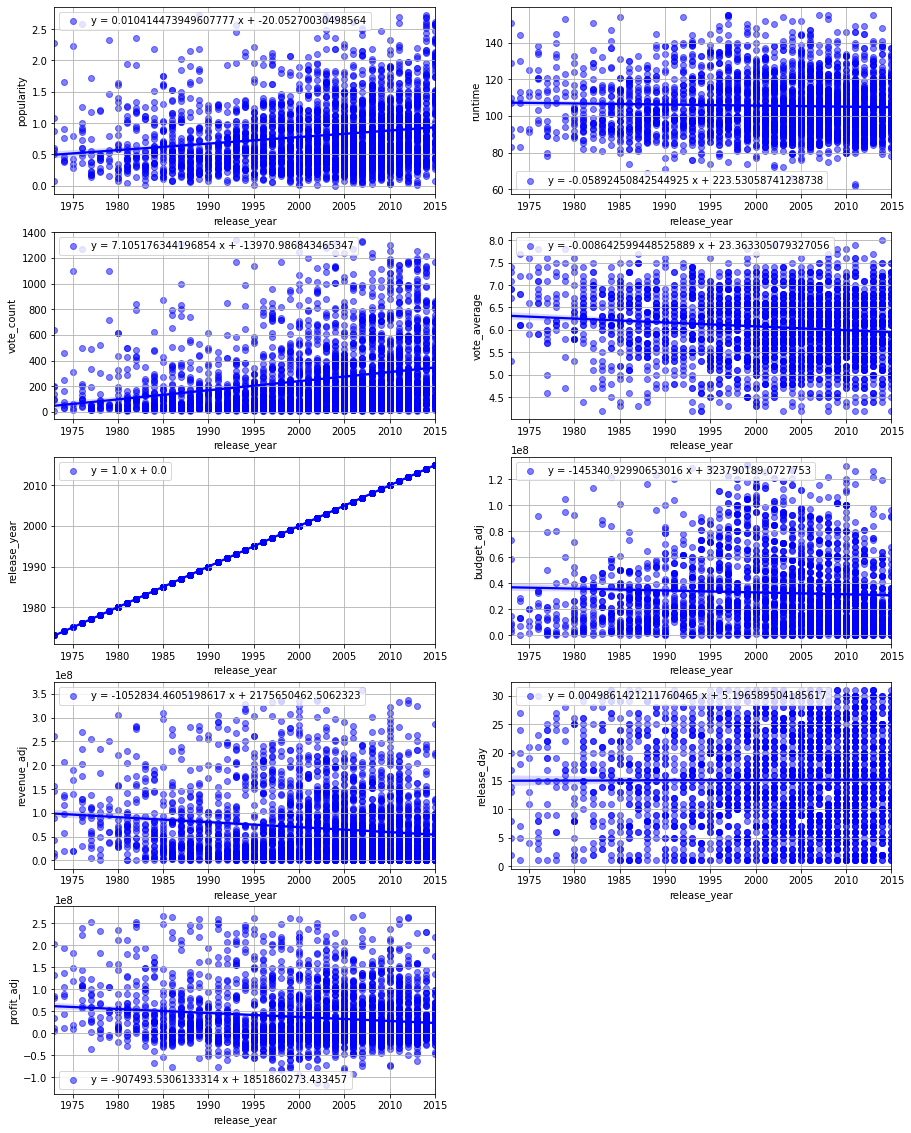

In [45]:
x="release_year"
plt.figure(figsize = (15,20))
for i, y in enumerate(df.select_dtypes(include=["number"]).columns):
  plt.subplot(math.ceil(len(df.select_dtypes(include=["number"]).columns)/2),2,i+1)
  slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])
  sns.regplot(data=df, x=x, y=y, 
              color="b", scatter_kws={'alpha':0.5}, 
              label = "y = " + str(slope) + " x + "+ str(intercept));
  print("y = {:<020} x + {:<020} : Regression Line between '{}' and '{}'".format(slope, intercept, x, y)) 
  plt.grid()
  plt.legend();

Across years: The vote_count increase

Across years: The runtime, budject, revenue, profit decreased

### Q: What kinds of properties are associated with movies that have high revenues?

#### Correlation map

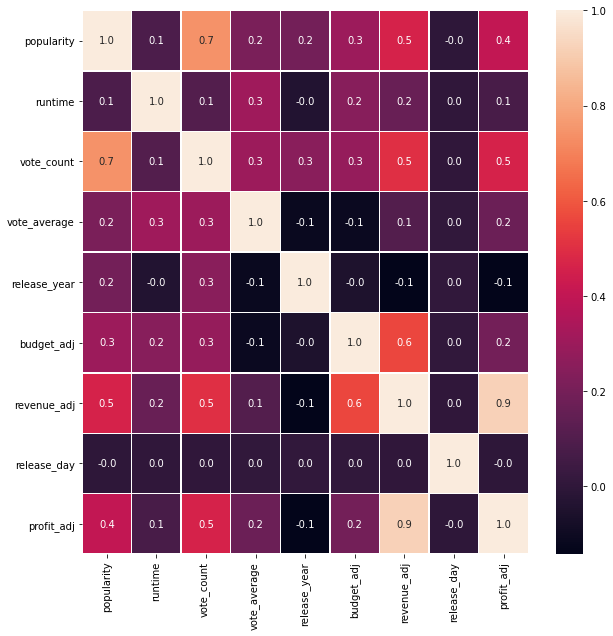

In [46]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt = '.1f', ax = ax)
plt.show()

#### Features that are affecting the revenue

revenue_adj     1.000000
profit_adj      0.922761
budget_adj      0.558344
vote_count      0.501232
popularity      0.463083
runtime         0.161564
vote_average    0.103609
release_day     0.001804
release_year   -0.139830
Name: revenue_adj, dtype: float64


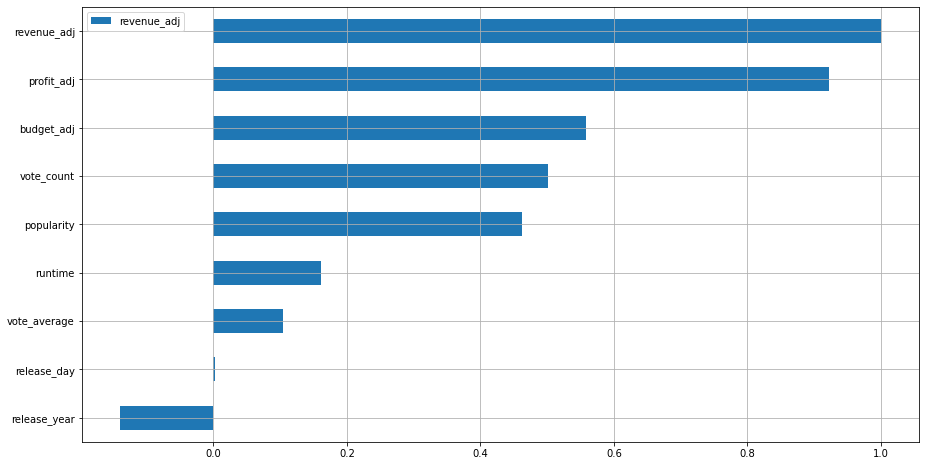

In [47]:
plt.figure(figsize = (15,8))
df.corr()["revenue_adj"].sort_values(ascending=True).plot.barh();
print(df.corr()["revenue_adj"].sort_values(ascending=False))
plt.grid()
plt.legend();

#### Scatter Plot and regression equation

y = 65626250.04480575000 x + 15549859.53655927600 : Regression Line between 'revenue_adj' and 'popularity'
y = 771378.6980685283000 x + -13563520.4973906430 : Regression Line between 'revenue_adj' and 'runtime'
y = 133979.0679417009500 x + 33882493.01812482600 : Regression Line between 'revenue_adj' and 'vote_count'
y = 10435616.95272126000 x + 4618114.027505681000 : Regression Line between 'revenue_adj' and 'vote_average'
y = -1052834.46051986170 x + 2175650462.506232300 : Regression Line between 'revenue_adj' and 'release_year'
y = 1.420878781580845200 x + 21237751.46376572500 : Regression Line between 'revenue_adj' and 'budget_adj'
y = 1.000000000000000000 x + 0.000000000000000000 : Regression Line between 'revenue_adj' and 'revenue_adj'
y = 15349.11124622306000 x + 67632661.46312076000 : Regression Line between 'revenue_adj' and 'release_day'
y = 1.090818174219252000 x + 29633112.07863450800 : Regression Line between 'revenue_adj' and 'profit_adj'


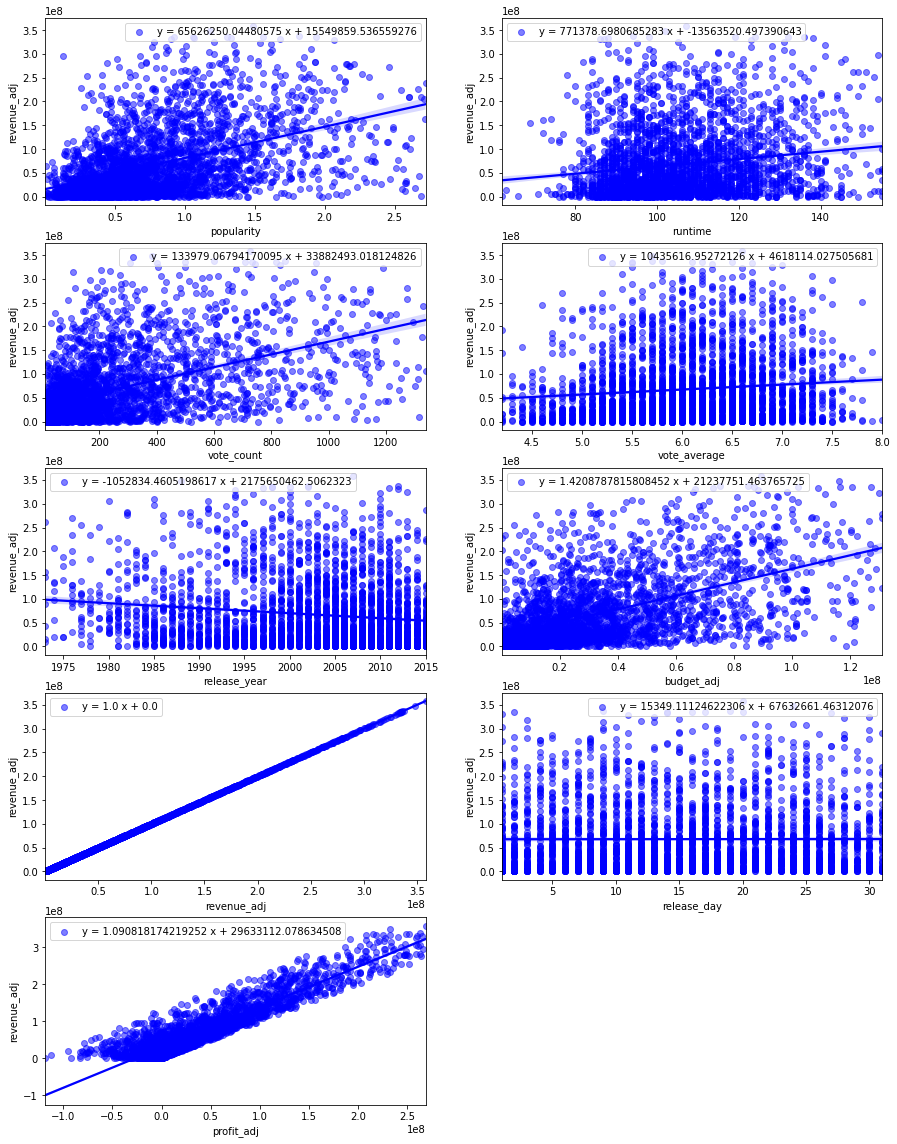

In [48]:
y="revenue_adj"
plt.figure(figsize = (15,20))
for i, x in enumerate(df.select_dtypes(include=["number"]).columns):
  plt.subplot(math.ceil(len(df.select_dtypes(include=["number"]).columns)/2),2,i+1)
  slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])
  sns.regplot(data=df, x=x, y=y, 
              color="b", scatter_kws={'alpha':0.5}, 
              label = "y = " + str(slope) + " x + "+ str(intercept));
  print("y = {:<020} x + {:<020} : Regression Line between '{}' and '{}'".format(slope, intercept, y, x)) 
  plt.legend();

## Q: What is the relation between budget, runtime and popularity over revenue?

Original Data Set: y=2.726054x+(3519276.840409) relation between revenue_adj and budget_adj
Cleaned Data Set : y=1.420879x+(21237751.463766) relation between revenue_adj and budget_adj
Original Data Set: y=809666.916462x+(-31279037.849482) relation between revenue_adj and runtime
Cleaned Data Set : y=771378.698069x+(-13563520.497390) relation between revenue_adj and runtime
Original Data Set: y=88076961.955474x+(-5572191.879012) relation between revenue_adj and popularity
Cleaned Data Set : y=65626250.044806x+(15549859.536559) relation between revenue_adj and popularity


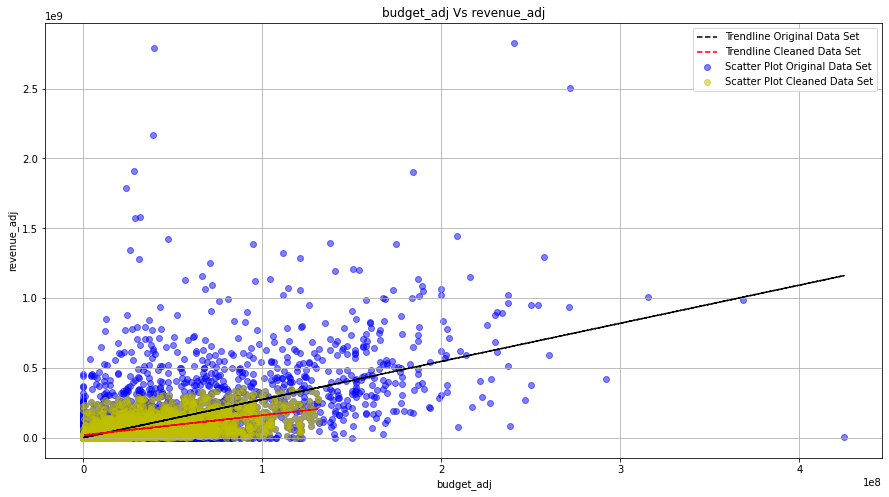

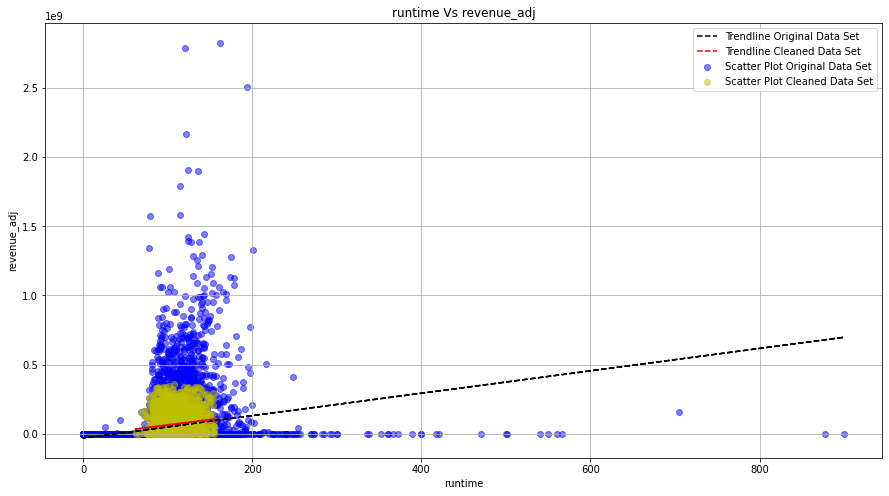

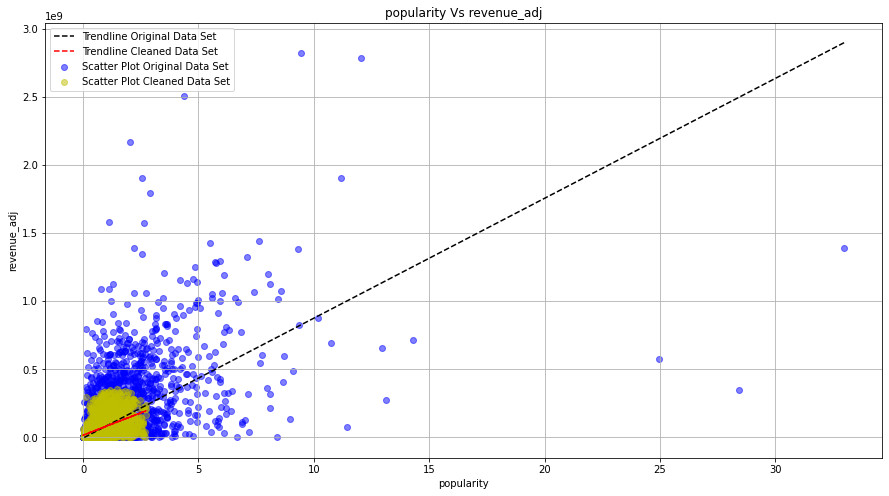

In [49]:
C = ["budget_adj", "runtime", "popularity"]
C2 = "revenue_adj"
for C1 in C:
  plt.figure(figsize = (15,8))
  x = df_Original[C1]
  y = df_Original[C2]

  # calc the trendline
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.plot(x,p(x),"k--", label = "Trendline Original Data Set");
  plt.scatter(x,y, alpha=0.5, c = "b", label = "Scatter Plot Original Data Set");
  # the line equation:
  print ("Original Data Set: y=%.6fx+(%.6f)"%(z[0],z[1]), "relation between {} and {}".format(C2, C1))

  x = df[C1]
  y = df[C2]

  # calc the trendline
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.plot(x,p(x),"r--", label = "Trendline Cleaned Data Set");
  plt.scatter(x,y, alpha=0.5, c= "y", label = "Scatter Plot Cleaned Data Set") ;
  # the line equation:
  print("Cleaned Data Set : y=%.6fx+(%.6f)"%(z[0],z[1]), "relation between {} and {}".format(C2, C1))

  plt.title(C1+" Vs " +C2)
  plt.xlabel(C1);
  plt.ylabel(C2);
  plt.grid(True);
  plt.legend();

In [50]:
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,profit_adj
popularity,1.000000,0.087269,0.743067,0.213854,0.196018,0.303627,0.463083,-0.003683,0.406380
runtime,0.087269,1.000000,0.107286,0.312447,-0.037365,0.247868,0.161564,0.003389,0.075848
vote_count,0.743067,0.107286,1.000000,0.302149,0.252239,0.281758,0.501232,0.004772,0.461635
vote_average,0.213854,0.312447,0.302149,1.000000,-0.115612,-0.108991,0.103609,0.005905,0.173108
release_year,0.196018,-0.037365,0.252239,-0.115612,1.000000,-0.049123,-0.139830,0.005635,-0.142478
budget_adj,0.303627,0.247868,0.281758,-0.108991,-0.049123,1.000000,0.558344,0.006204,0.195508
revenue_adj,0.463083,0.161564,0.501232,0.103609,-0.139830,0.558344,1.000000,0.001804,0.922761
release_day,-0.003683,0.003389,0.004772,0.005905,0.005635,0.006204,0.001804,1.000000,-0.000749
profit_adj,0.406380,0.075848,0.461635,0.173108,-0.142478,0.195508,0.922761,-0.000749,1.000000


# <font color='red'>Conclusions</font>
# ==========================================================

* The dataset contains 10866 Rows and 21 Columns.
* The year with maximum movies prduction is 2014 and it has 700 movies.
* The film Avatar got the highest revenue 2,827,123,750$.
* The popularity of genere in order: Drama, Comedy, Thriller.
* The genere that is popular from year to year is Animation then Fantasy, the Sience Fiction.
* The average runtime of movies decrease from year to year.
* Across years: The vote_count increase.
* Across years: The runtime, budject, revenue, profit decreased.
* The month of september has the highest production over years.
* The diresctor 'Woody Allen' is the most successfull director with 45 films.



## Limitation

* We used the original data set in some of our analysis, that is because the feature used are well structured.
* We removed the rows that have revenue or budget with value zero; this affect the size of the data used.
* We used the IQR to remove the oulier

# <h1><center>Thanks You</center></h1>